# Árboles de Regresión

In [274]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from graphviz import Source

In [275]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [276]:
data.shape

(506, 14)

In [277]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [278]:
regtree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,max_depth=5,random_state=0)

In [279]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [280]:
preds = regtree.predict(data[predictors])

In [281]:
data["preds"] = preds

In [282]:
data[["preds","medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


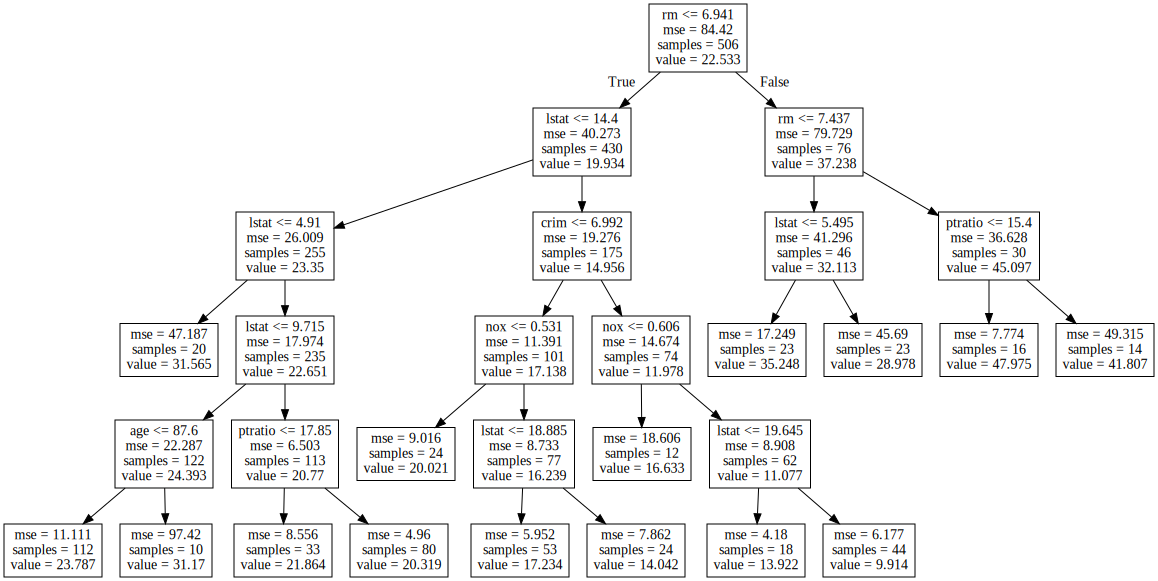

In [283]:
with open("resources/boston_rtree.dot","w") as dotfile:
    export_graphviz(regtree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

file = open("resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [284]:
cv = KFold(n_splits=10,shuffle=True,random_state=1)
scores = cross_val_score(regtree,X,Y,scoring="neg_mean_squared_error", cv = cv, n_jobs=-1)
print(scores)
score = np.mean(scores)
print(score)

[-14.21501779 -16.62018743 -18.48312343 -46.22608214 -10.25202434
 -18.39546877 -15.08005674 -32.23929702 -23.04375075 -10.93761052]
-20.54926189262014


In [285]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

## Random Forests

In [286]:
forest = RandomForestRegressor(n_jobs = -1, oob_score = True, n_estimators = 500)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True)

In [287]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred","medv"]]

,rforest_pred,medv
0,28.332353,24.0
1,22.629167,21.6
2,34.796020,34.7
3,34.989017,33.4
4,34.241117,36.2
...,...,...
501,24.201596,22.4
502,19.219672,20.6
503,27.604348,23.9
504,25.777778,22.0


In [288]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.396204426616086

In [289]:
forest.oob_score_

0.8768507570996414